<a href="https://colab.research.google.com/github/Code-Test-Source/MCM26-25Crepo/blob/main/Figure%202%3A%20PCA%20Bioplot%EF%BC%88a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

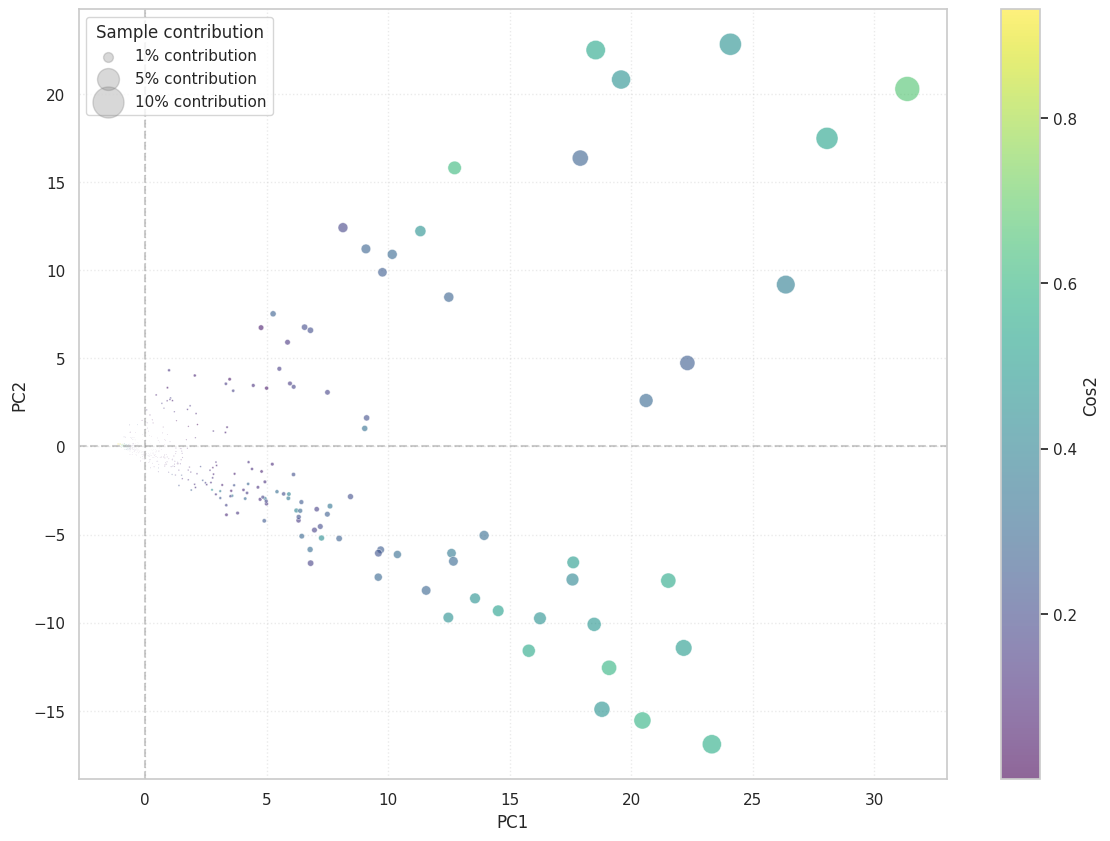

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- 1. 设置路径与加载唯一的文件 ---
folder_path = '/content/drive/MyDrive/'
# 仅读取这一个文件
df = pd.read_csv(os.path.join(folder_path, 'summerOly_pca_features.csv'))

# --- 2. 手动计算 Cos2 和 Contrib (避免创建新文件，直接在内存中计算) ---
# 找到所有 PC 列
pc_cols = [c for c in df.columns if 'Sport_PC_' in c]

# 计算每个点在多维空间的总长度平方
total_dist_sq = (df[pc_cols]**2).sum(axis=1)

# 计算 Cos2 (代表性)
df['cos2'] = (df['Sport_PC_1']**2 + df['Sport_PC_2']**2) / total_dist_sq

# 计算 Contrib (贡献度百分比)
total_variance = (df['Sport_PC_1']**2 + df['Sport_PC_2']**2).sum()
df['contrib_pct'] = ((df['Sport_PC_1']**2 + df['Sport_PC_2']**2) / total_variance) * 100

# --- 3. 绘图 ---
plt.figure(figsize=(14, 10)) # 增大图表尺寸，提供更多空间

# 绘制点：s 映射 contrib_pct (大小)，c 映射 cos2 (颜色)
scatter = plt.scatter(
    df['Sport_PC_1'],
    df['Sport_PC_2'],
    c=df['cos2'],
    s=df['contrib_pct'] * 50, # 进一步减小放大系数，控制点的大小感，减少重叠
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

# --- 4. 添加图例 (这是你要求的关键部分) ---

# A. 添加颜色条 (代表 Cos2)
cbar = plt.colorbar(scatter)
cbar.set_label('Cos2')

# B. 添加大小图例 (代表 Contrib)
# 我们手动创建几个空点来展示不同贡献度的比例
for size in [1, 5, 10]:
    plt.scatter([], [], c='gray', alpha=0.3, s=size * 50, # 统一大小图例的缩放比例
                label=f'{size}% contribution')

# 设置图例位置和标题
plt.legend(title="Sample contribution", loc="upper left", frameon=True, scatterpoints=1)

# --- 5. 修饰 ---

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0, color='black', linestyle='--', alpha=0.2)
plt.axvline(0, color='black', linestyle='--', alpha=0.2)
plt.grid(True, linestyle=':', alpha=0.4)

plt.show()